# Redshift distribution of strong gravitational lenses

In [17]:
from __future__ import division
import os, os.path
import glob
import sys
import re
import Clusters as c
import numpy as np
import astropy
from matplotlib import pyplot as plt, rc
from astropy.cosmology import LambdaCDM
from astropy import units as u
from collections import Counter
import h5py
sys.path.insert(0, '/cosma5/data/dp004/dc-beck3')
import readlensing as rf
import readsnap

rc('text',usetex=True)
rc('text.latex', preamble='\usepackage{color}')
rc('figure', figsize=(8,6))
rc('font', size=18)
rc('lines', linewidth=3)
rc('axes', linewidth=2)
rc('xtick.major', width=2)
rc('ytick.major', width=2)

In [18]:
LCSettings = '/cosma5/data/dp004/dc-beck3/shell_script/LCSettings.txt'
sim_dir, sim_phy, sim_name, sim_col, hd_dir, lc_dir, glafic_dir, HQ_dir = rf.Simulation_Specs(LCSettings)
lens_dir = '/cosma5/data/dp004/dc-beck3/LensingMap/'

h = 0.6774
labels = ['FP_GR', 'FP_F6']
colour = ['r', 'b']

In [ ]:
# Lensing Rates
# Chapter 2.2: https://arxiv.org/pdf/1001.2037.pdf
theta_min = 0.5  #[arcsec]
theta_max = 4  #[arcsec]

sigma_lens = du/mu 

prob = dtheta dzl u.c*dt/dzl *(1 + zl)**3 * (dndv*dvdtheta * sigma_lens)

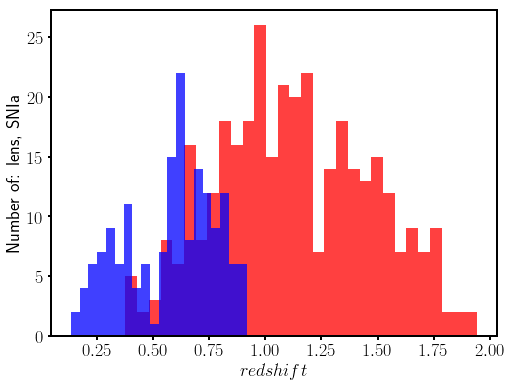

In [19]:
for sim in range(len(sim_dir))[:1]:
    # Simulation Snapshots
    snapfile = sim_dir[sim]+'snapdir_%03d/snap_%03d'
    # LightCone file for lens & source properties
    lc_file = lc_dir[sim]+'LC_SN_'+sim_name[sim]+'.h5'
    # LensingMap files
    lm_dir = HQ_dir+'LensingMap/'+sim_phy[sim]+'/'+sim_name[sim]+'/'
    
    # Load LightCone Contents
    LC = rf.LightCone_with_SN_lens(lc_file, 'dictionary')

    # LensMaps filenames
    lm_files = [name for name in glob.glob(lm_dir+'LM_L*')]  
    Halo_ID_list=[]; zl_list=[]; zs_list=[]
    for ll in range(len(lm_files)):
        # Load LensingMap Contents
        s = re.findall('[+-]?\d+', lm_files[ll])
        Halo_ID = s[-3]
        LM = h5py.File(lm_files[ll])
        zs_list.append(LM['zs'].value)  #[arcsec]
        if Halo_ID not in Halo_ID_list:
            Halo_ID_list.append(Halo_ID)
            zl_list.append(LM['zl'].value)  #[arcsec]
            
    zs = np.asarray(zs_list)
    zl = np.asarray(zl_list)
    plt.hist(zs, 30, facecolor='r', alpha=0.75)
    plt.hist(zl, 20, facecolor='b', alpha=0.75)
plt.xlabel(r'$redshift$')
plt.ylabel(r'Number of: \textcolor{blue}{lens}, \textcolor{red}{SNIa}')
plt.legend(loc=2)
plt.show()